<img src="lipidintro.png" width="45%"/>

## What should the rest of the voltage line look like?
If a current is applied across a lipid bilayer, what is the voltage across the lipid bilayer?

## Physical -> Model
Model is an ideal capacitor.<br>
Model involves abstraction. Hopefully captures relevance.

## Model -> Representation in NEURON
The ideal is "complete" faithfulness to the Model. That is not always attained because of computer "accidents" like discretization.

In [1]:
from neuron import h

# Representation

# Single compartment cell. Default capacitance, cm = 1 uF/cm2
s = h.Section()
s.L = s.diam = h.sqrt(100/h.PI) # L and diam are microns. 100um2 means 1nA = 1mA/cm2

# Current stimulus
ic = h.IClamp(s(.5))
ic.delay = 1  # ms
ic.dur = 2    # ms
ic.amp = 0.04 # nA


In [2]:
# record time, current, and voltage for plotting after a run
t = h.Vector().record(h._ref_t, sec=s)
v = h.Vector().record(s(.5)._ref_v, sec=s)
i = h.Vector().record(ic._ref_i, sec=s)

In [3]:
# Run for 5ms using the standard run system
h.load_file("stdrun.hoc")
h.tstop = 5
h.run()

0.0

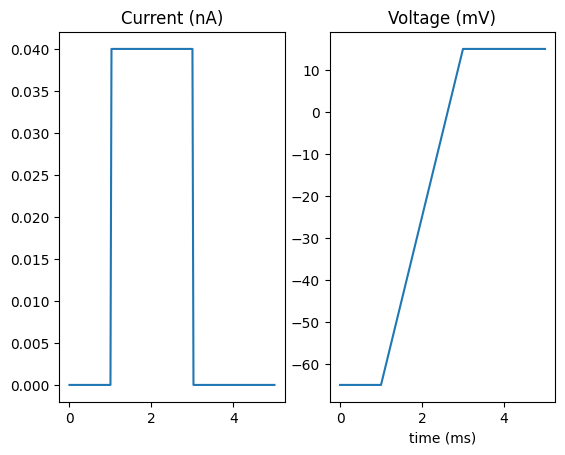

In [4]:
# plot the results, current voltage side by side
import matplotlib.pyplot as plt

def plot():
    plt.subplot(1,2,1)
    plt.title("Current (nA)")
    plt.plot(t, i)

    plt.subplot(1,2,2)
    plt.title("Voltage (mV)")
    plt.xlabel("time (ms)")
    plt.plot(t, v)

plot()

# Questions

### If one injects 1mA current (for 2 ms), is the model a good fit to reality?

old = ic.amp<br>
ic.amp = 1e6<br>
h.run()<br>
plot()<br>
ic.amp = old

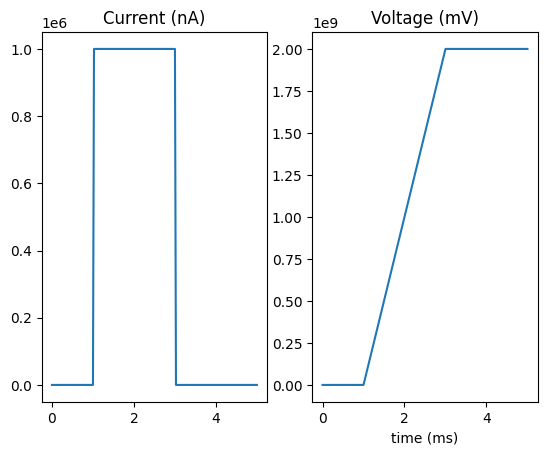

In [5]:
old = ic.amp
ic.amp = 1e6
h.run()
plot()
ic.amp = old

### If the current amplitude is increased by 100 and the duration decreased by 100, is the sim correct?
The problem can be fixed by reducing h.dt from it's default value, cf print(h.dt, ic.dur) , or by using the variable time step method, h.cvode_active(1)

0.025 0.02


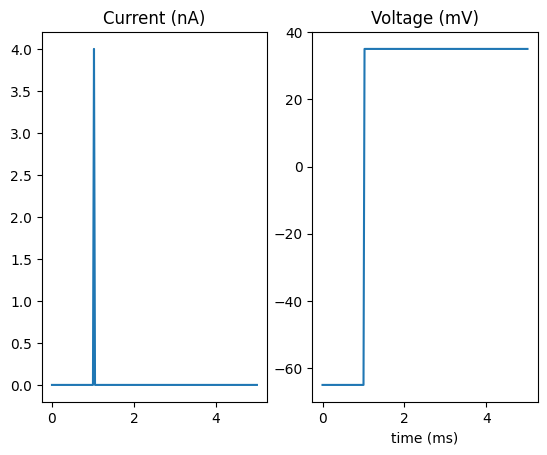

In [6]:
ic.amp *= 100
ic.dur /= 100
print(h.dt, ic.dur)
#h.cvode_active(1)
h.run()
plot()
ic.amp /= 100
ic.dur *= 100

Fixed step sim is inaccurate unless integer number of dt steps in ic.dur

### If the current amplitude is increased and the duration decreased by a factor of 1e6 ...?
Decreasing dt accordingly will result in a very long running simulation. Best to use cvode.

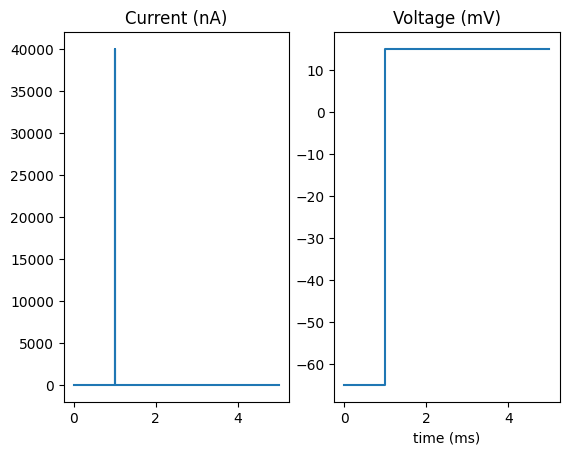

In [7]:
ic.amp *= 1e6
ic.dur /= 1e6
h.cvode_active(1)
h.run()
plot()